In [32]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import pandas_ta as ta
  

ModuleNotFoundError: No module named 'keras'

In [33]:
data = yf.download("PLUG, BEP, NEE, JKS, XOM", start="2018-01-01", end=dt.date.today())
ticker = 'PLUG BEP NEE JKS XOM'
data

[*********************100%***********************]  5 of 5 completed


Adj Close                                                   Close  \
                  BEP        JKS        NEE       PLUG         XOM        BEP   
Date                                                                            
2018-01-02  15.358140  25.059999  35.021721   2.420000   66.545746  18.609114   
2018-01-03  15.274578  24.330000  34.278793   2.420000   67.852722  18.507860   
2018-01-04  15.076659  24.190001  34.102665   2.400000   67.946640  18.268051   
2018-01-05  15.155826  24.230000  34.258469   2.360000   67.891861  18.363976   
2018-01-08  15.067864  24.129999  34.540733   2.330000   68.197067  18.257395   
...               ...        ...        ...        ...         ...        ...   
2022-06-03  35.799999  62.139999  78.690002  17.900000   99.089996  35.799999   
2022-06-06  36.680000  67.099998  80.190002  18.580000   98.839996  36.680000   
2022-06-07  36.279999  66.779999  79.779999  18.850000  103.370003  36.279999   
2022-06-08  36.549999  65.589996  78.489998  18.540001  104.589996  36.549999   
2022-06-09  36.560001  61.680000  77.339996  16.920000  102.330002  36.560001   

                                                         ...       Open  \
                  JKS        NEE       PLUG         XOM  ...        BEP   
Date                                                     ...              
2018-01-02  25.059999  38.772499   2.420000   85.029999  ...  18.699707   
2018-01-03  24.330000  37.950001   2.420000   86.699997  ...  18.694378   
2018-01-04  24.190001  37.755001   2.400000   86.820000  ...  18.651745   
2018-01-05  24.230000  37.927502   2.360000   86.750000  ...  18.363976   
2018-01-08  24.129999  38.240002   2.330000   87.139999  ...  18.385292   
...               ...        ...        ...         ...  ...        ...   
2022-06-03  62.139999  78.690002  17.900000   99.089996  ...  35.419998   
2022-06-06  67.099998  80.190002  18.580000   98.839996  ...  36.470001   
2022-06-07  66.779999  79.779999  18.850000  103.370003  ...  36.619999   
2022-06-08  65.589996  78.489998  18.540001  104.589996  ...  35.990002   
2022-06-09  61.680000  77.339996  16.920000  102.330002  ...  36.680000   

                                                         Volume           \
                  JKS        NEE       PLUG         XOM     BEP      JKS   
Date                                                                       
2018-01-02  24.120001  39.107498   2.380000   83.820000  125163   396600   
2018-01-03  25.209999  38.522499   2.400000   85.160004  141300   534000   
2018-01-04  24.209999  37.877499   2.400000   86.790001  158377   422800   
2018-01-05  24.299999  37.845001   2.430000   86.750000  157814   328500   
2018-01-08  24.250000  37.927502   2.350000   86.699997  105084   358300   
...               ...        ...        ...         ...     ...      ...   
2022-06-03  61.639999  78.089996  17.950001   97.900002  154200   603000   
2022-06-06  66.320000  81.190002  18.340000   99.180000  162800  3181300   
2022-06-07  66.250000  79.760002  18.139999   99.699997  240400  1227000   
2022-06-08  66.690002  78.980003  18.950001  103.489998  110900   987200   
2022-06-09  64.000000  78.239998  18.059999  103.419998  252451   771094   

                                          
                 NEE      PLUG       XOM  
Date                                      
2018-01-02   4766400   2845600  11469300  
2018-01-03  11008000   2331100  13957700  
2018-01-04  13629200   2458000  10863000  
2018-01-05  10318000   3217600  11047600  
2018-01-08   7225200   3720700  10927100  
...              ...       ...       ...  
2022-06-03   9293500  14486100  21032800  
2022-06-06  12716900  24261400  20682100  
2022-06-07   7405600  17176800  37810200  
2022-06-08   5198000  21536500  31613200  
2022-06-09   8354577  19594785  26591418  

[1118 rows x 30 columns]

In [34]:
#Creating own dataframe for each stock
start = "2018-01-01"
end=dt.date.today()
BEP = yf.download('BEP',start,end)
PLUG = yf.download('PLUG',start,end)
NEE = yf.download('NEE',start,end)
JKS = yf.download('JKS',start,end)
FSLR = yf.download('FSLR',start,end)
XOM = yf.download('XOM', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
df = data["Adj Close"]

In [36]:
df

,BEP,JKS,NEE,PLUG,XOM
Date,,,,,
2018-01-02,15.358140,25.059999,35.021721,2.420000,66.545746
2018-01-03,15.274578,24.330000,34.278793,2.420000,67.852722
2018-01-04,15.076659,24.190001,34.102665,2.400000,67.946640
2018-01-05,15.155826,24.230000,34.258469,2.360000,67.891861
2018-01-08,15.067864,24.129999,34.540733,2.330000,68.197067
...,...,...,...,...,...
2022-06-03,35.799999,62.139999,78.690002,17.900000,99.089996
2022-06-06,36.680000,67.099998,80.190002,18.580000,98.839996
2022-06-07,36.279999,66.779999,79.779999,18.850000,103.370003


In [37]:
short_rolling = df.rolling(window=20).mean()
short_rolling.head(20)

,BEP,JKS,NEE,PLUG,XOM
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN
2018-01-10,NaN,NaN,NaN,NaN,NaN
2018-01-11,NaN,NaN,NaN,NaN,NaN
2018-01-12,NaN,NaN,NaN,NaN,NaN


In [38]:
# Calculating the long-window simple moving average
long_rolling = df.rolling(window=100).mean()
long_rolling.tail()


,BEP,JKS,NEE,PLUG,XOM
Date,,,,,
2022-06-03,35.807342,49.3887,77.430031,22.4942,82.444313
2022-06-06,35.835628,49.6040,77.393477,22.4290,82.734191
2022-06-07,35.866198,49.8113,77.349856,22.3710,83.071425
2022-06-08,35.902218,50.0145,77.295214,22.3173,83.425852
2022-06-09,35.946195,50.1579,77.245883,22.2521,83.745539


NameError: name 'my_year_month_fmt' is not defined

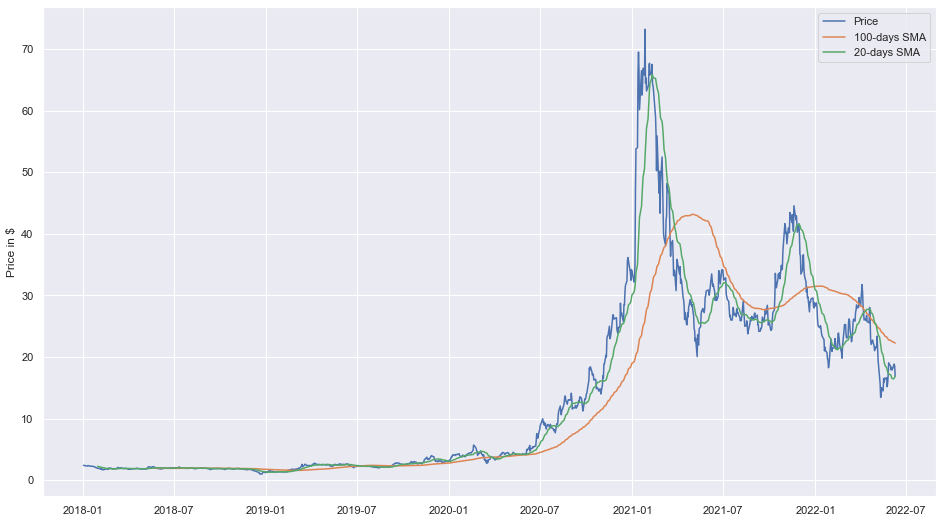

In [39]:

start_date = '2018-01-01'
end_date = dt.date.today()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df.loc[start_date:end_date, :].index,df.loc[start_date:end_date, 'PLUG'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'PLUG'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'PLUG'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

NameError: name 'my_year_month_fmt' is not defined

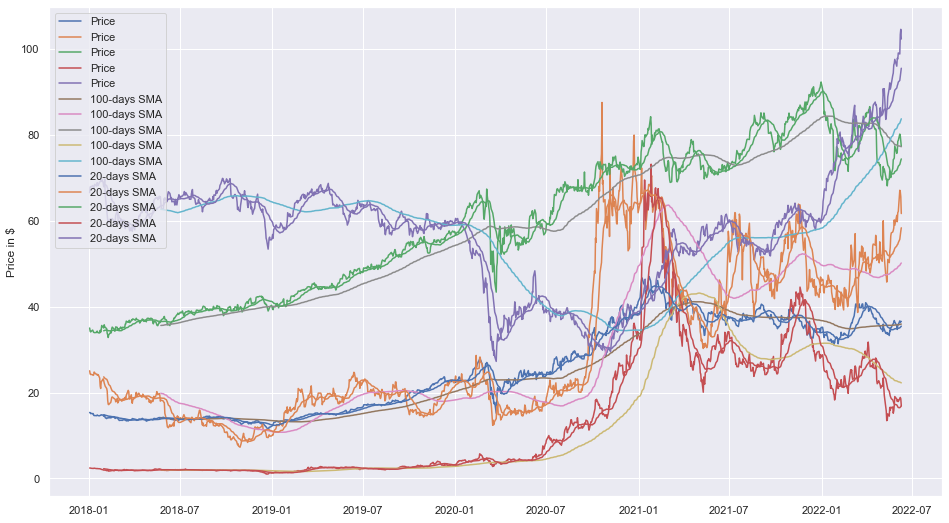

In [42]:

start_date = '2018-01-01'
end_date = dt.date.today()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df.loc[start_date:end_date, :].index,df.loc[start_date:end_date], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [52]:
# defining x and y 
x = df.index
y = df
y
# Data Exploration
# i like to set up a plot function so i can reuse it at later stages of this analysis 
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

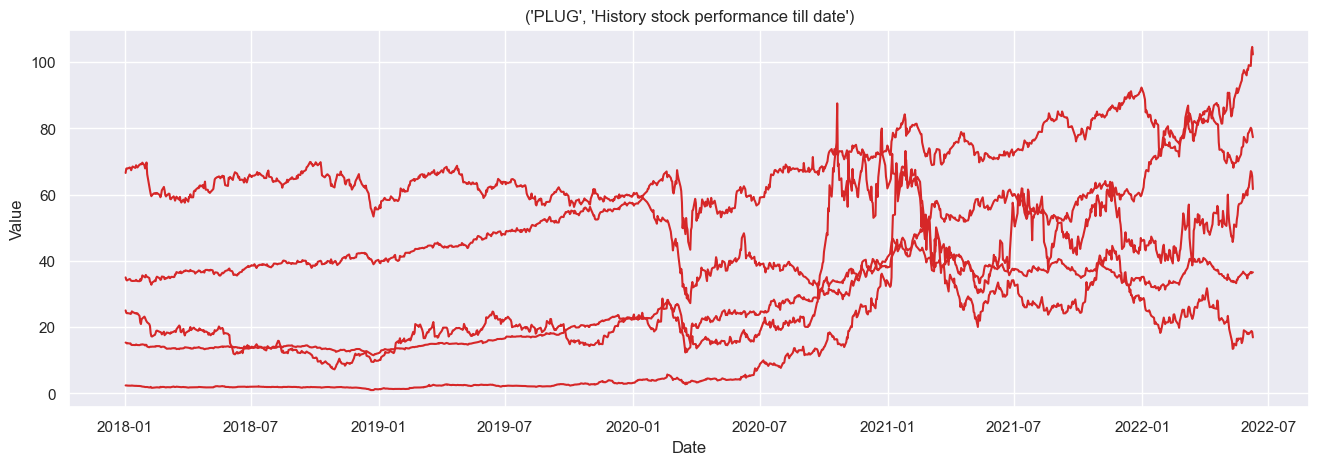

In [53]:
stock_name= "PLUG"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)